### Question1
Multiplication of a (n,k) and (k,m) matrix results in a (n,m) matrix where to obtain any (i,j)<sub>th</sub> element involves multiplication of each element in i<sub>th</sub> row of first matrix with corressponding element in j<sub>th</sub> column in second matrix and summing the obtained numbers. Now the number of multiplications for generating each element become k and number of additions (k-1). For n × m elements in the resultant matrix, number of multiplications are n × m × k, while additions are n × m × (k-1)

### Question 2

In [4]:
from random import randint
import time
import numpy as np

In [5]:
# Using 200 × 200 matrices for this test of speed
a = [[randint(0,10) for i in range(200)] for j in range(200)]   #randomly generating 200 × 200 matrices filled with integers between 0 and 10, both inclusive
b = [[randint(0,10) for i in range(200)] for j in range(200)]
c = [[0 for i in range(200)] for j in range(200)]
print("Multiplication of 2 randomly generated matrices taking place")
start = time.time()
for i in range(200):
    for j in range(200):
        for k in range(200):
            c[i][j] += (a[i][k] * b[k][j])
end = time.time()
print("Time taken by list of lists is: ",end - start)
a = np.matrix(a)
b = np.matrix(b)
start = time.time()
c = np.matmul(a,b)
end = time.time()
print("Time taken by numpy matrices is: ",end - start)

Multiplication of 2 randomly generated matrices taking place
Time taken by list of lists is:  2.315802574157715
Time taken by numpy matrices is:  0.007993698120117188


The reason for numpy taking so litle time compared to one implemented manually is due to the fact that the numpy function at a lower level can take advantage of parallelization while computing all those multiplications before additions and computation of different cells happening simultaneously. This unlike the manual implementation seem the order seem lesser as we are not doing each step sequentially (in series) saving lots of time. Moreover, there are other reasons like python lists can contain variable datatypes which slows down our process by adding some checks on top of our code, whereas, numpy's matmul function takes advantage of homogeniety of numpy matrices.

### Question 3
The suggested method is a $n^2$ approach while a better approach can be sorting the array and directly accessing the middle term. (Assuming an odd number of elements, median is in the array) The result of 1st method was not very comparable with other 2 methods, so had to make a seperate cell to run them. The function numpy.median is also of same order as our sorting approach.

In [6]:
#assuming array of length 4001
a = np.array([randint(0,10) for i in range(4001)])  #randomly generating array
b = a                                               #making a copy so the swapping doesn't modify the actual array
start = time.time_ns()
for i in range(2001):
    small = i
    for j in range(i+1,4001):
        if b[small]>b[j]:
            small = j
    b[i],b[small]=b[small],b[i]
print("median is: ",b[2000]," found in: ",(time.time_ns() - start)/1e9,"s found using method given of O(n^2)")

median is:  5  found in:  2.7298847 s found using method given of O(n^2)


In [7]:
start = time.time_ns()
b = sorted(a)
print("median is: ",b[2000], "found in: ",(time.time_ns() - start)/1e9,"s found using sorting method O(nlog(n))")
start = time.time_ns()
b = np.median(a)
print("median is: ",b,"found in: ",(time.time_ns() - start)/1e9,"s found using numpy.median O(nlog(n))")

median is:  5 found in:  0.0079974 s found using sorting method O(nlog(n))
median is:  5.0 found in:  0.0032246 s found using numpy.median O(nlog(n))


The method of computing median of an n length array using n/2 passes makes the process $O(n^2)$ which is evidently much worse then the using sorting to find the median, which makes the time complexity $O(nlog(n))$ which is roughly close to what is provided by numpy library's function numpy.median which is essentially of same big O time complexity. Therefore, it can be observed that even though performance of numpy function is still better than our implementation, atleast its of the same order and comparable.

### Question 4
Gradient of $(x^2y + y^3sin(x))$ with respect to x is $(2xy + y^3cos(x))$, while with respect to y is $(x^2 + 3y^2sin(x))$

### Question 5

In [8]:
import jax.numpy as jnp
import jax

In [9]:
def f(x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)
def f_dx(x,y):
    return 2*x*y + (y**3)*jnp.cos(x)
def f_dy(x,y):
    return x**2 + 3*(y**2)*jnp.sin(x)
df_dx=jax.grad(f,argnums=0)
df_dy=jax.grad(f,argnums=1)

In [10]:
X = np.random.random(20)
Y = np.random.random(20)
for i in range(20):
    print(df_dy(X[i],Y[i]) - f_dy(X[i],Y[i]))
    print(df_dx(X[i],Y[i]) - f_dx(X[i],Y[i]))

0.0
0.0
0.0
0.0
0.0
1.4901161e-08
0.0
0.0
-5.9604645e-08
-5.9604645e-08
2.3841858e-07
0.0
0.0
1.1920929e-07
0.0
0.0
5.9604645e-08
5.9604645e-08
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-2.9802322e-08
-2.9802322e-08
5.9604645e-08
0.0
2.9802322e-08
0.0
0.0
0.0


As apparent above most differences between gradients is negligible which indicates our solution matches analytical solution.

### Question 6

In [12]:
from sympy import diff,sin,exp
from sympy.abc import x,y

In [17]:
f=(x**2)*y+(y**3)*(sin(x))
f_dx = diff(f,x)        #gradient with respect to x
f_dx

2*x*y + y**3*cos(x)

In [18]:
f_dy = diff(f,y)        #gradient with respect to y
f_dy

x**2 + 3*y**2*sin(x)

Above both expressions match the expected/predicted results

### Question 7
Below is the implementation of nested dictionaries for required data

In [20]:
data = {
    2022: {
        "Branch 1": [
            {"Roll No":1,"Name":"N","Marks":{
                "Maths":100,"English":70}},
            {"Roll No":21,"Name":"Gege","Marks":{
                "Maths":10,"English":90}}
            ##more students can be added in Branch1 2022, like above
        ],
        "Branch 2": [
            {"Roll No":420,"Name":"Nonu","Marks":{
                "Maths":100,"English":100}}
            #students in branch2 2022
        ]
    },
    2023: {
        "Branch 1": [],
        "Branch 2": []
    },
    2024: {
        "Branch 1": [],
        "Branch 2": []
    }
}
data

{2022: {'Branch 1': [{'Roll No': 1,
    'Name': 'N',
    'Marks': {'Maths': 100, 'English': 70}},
   {'Roll No': 21, 'Name': 'Gege', 'Marks': {'Maths': 10, 'English': 90}}],
  'Branch 2': [{'Roll No': 420,
    'Name': 'Nonu',
    'Marks': {'Maths': 100, 'English': 100}}]},
 2023: {'Branch 1': [], 'Branch 2': []},
 2024: {'Branch 1': [], 'Branch 2': []}}

### Question 8
Below is the implementation to create similar database using Python classes

In [21]:
class Student:
    def __init__(self, rollno, name, marks):
        self.rollno = rollno
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

In [32]:
database = [
    Year(2022),
    Year(2023),
    Year(2024)
]                                                   #Created skeleton database with all the year objects in it
for i in database:
    i.branches.append(Branch("Branch 1"))           #Adding both branches to all objects
    i.branches.append(Branch("Branch 2"))
database[0].branches[0].students.append(Student(1, 'N', {'Maths': 100, 'English': 70}))
database[0].branches[0].students.append(Student(21, 'Gege', {'Maths': 10, 'English': 90}))
database[0].branches[1].students.append(Student(420, 'Nonu', {'Maths': 100, 'English': 100}))       #Added students to specific branches for specific year similar to last implementation
database

### Question 9
Below are the plots for each function seperately

In [34]:
import matplotlib.pyplot as plt
x=np.arange(0.5,100,0.5)

Text(0, 0.5, 'x')

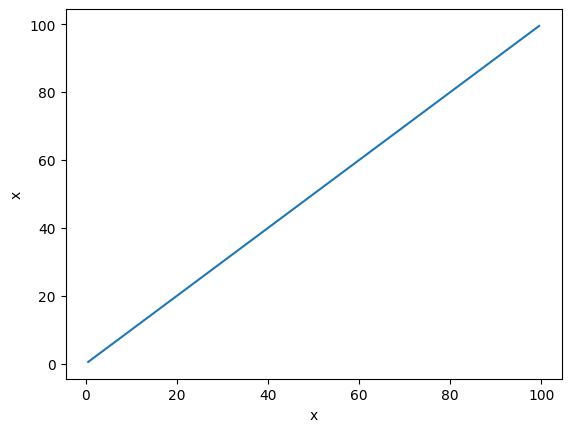

In [36]:
y = x
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("x")

Text(0, 0.5, 'x^2')

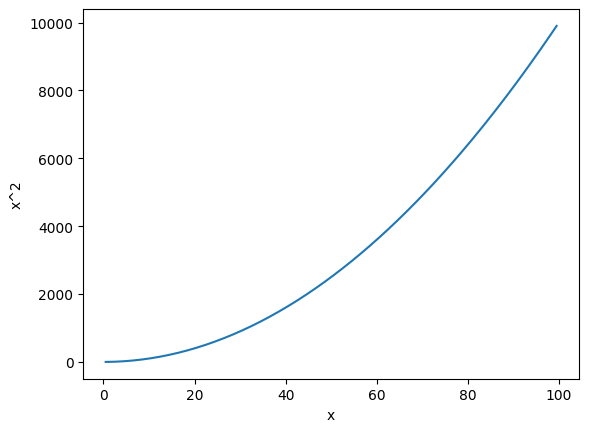

In [37]:
y = x**2
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("x^2")

Text(0, 0.5, 'x^3/100')

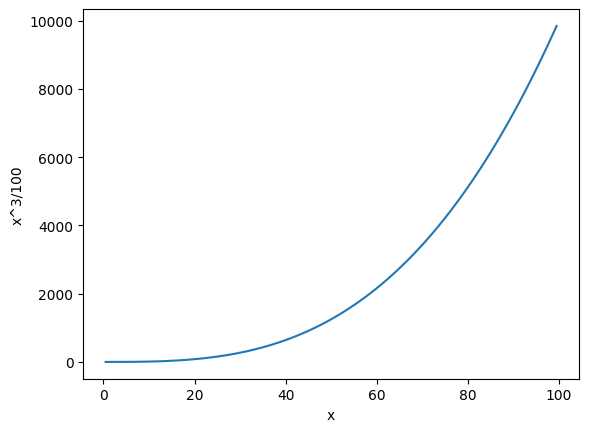

In [38]:
y = (x**3)/100
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("x^3/100")

Text(0, 0.5, 'sin(x)')

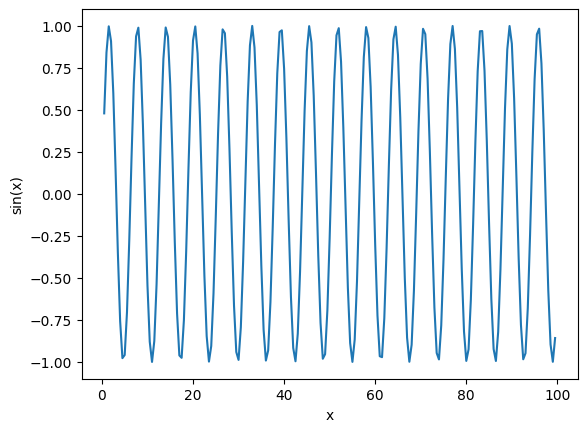

In [39]:
y = np.sin(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("sin(x)")

Text(0, 0.5, 'sin(x)/x')

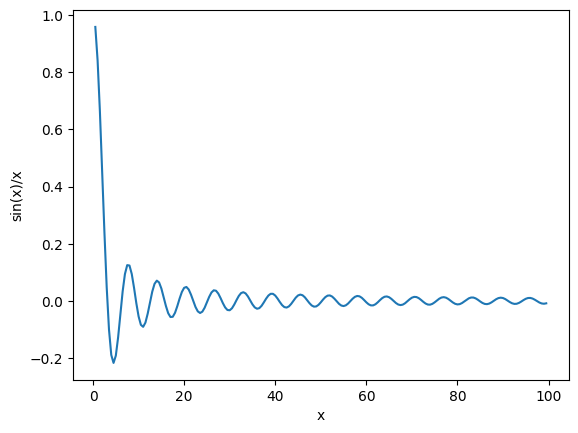

In [40]:
y = np.sin(x)/x
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("sin(x)/x")

Text(0, 0.5, 'log(x)')

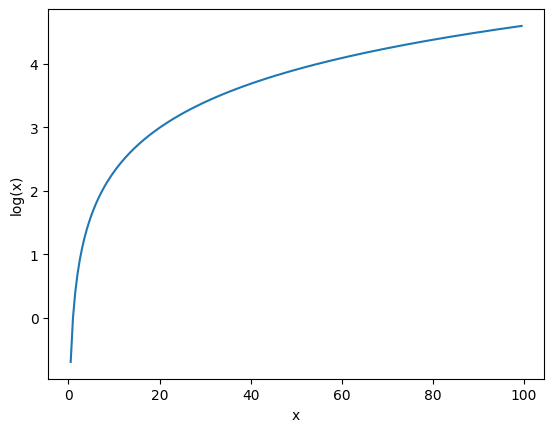

In [41]:
y = np.log(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("log(x)")

Text(0, 0.5, 'e^x')

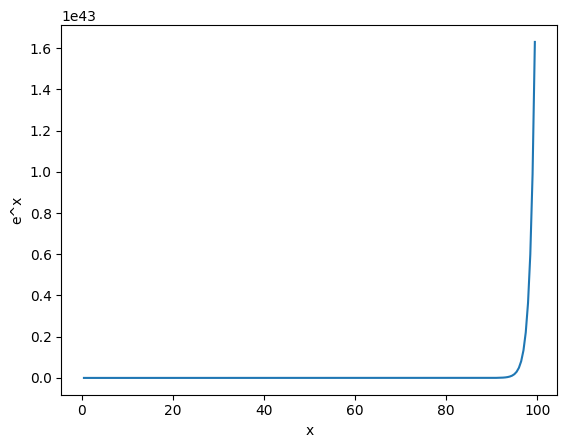

In [42]:
y = np.exp(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("e^x")

### Question 10

In [43]:
import pandas as pd

In [49]:
arr = np.random.uniform(1,2,(20,5))
df = pd.DataFrame(arr, columns=['a','b','c','d','e'])
print(df.columns[np.argmax(np.std(df,axis=0))])
print(np.argmin(np.mean(df,axis=1)))

d
6


### Question 11

In [52]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df['g'] = df['f'].apply(lambda x: "GT8" if x>8 else "LT8")
df

,a,b,c,d,e,f,g
0,1.758125,1.770802,1.367799,1.097276,1.148492,7.142495,LT8
1,1.129204,1.897639,1.211097,1.766136,1.740066,7.744141,LT8
2,1.547768,1.612052,1.628140,1.715375,1.160973,7.664309,LT8
3,1.608287,1.581618,1.264556,1.803468,1.776890,8.034819,GT8
4,1.653591,1.860374,1.266500,1.325826,1.396188,7.502478,LT8
5,1.530113,1.354149,1.906625,1.536950,1.585397,7.913234,LT8
6,1.369842,1.197159,1.456230,1.583621,1.061954,6.668805,LT8
7,1.690988,1.602039,1.685865,1.079312,1.078499,7.136703,LT8
8,1.395443,1.397821,1.658956,1.930147,1.066462,7.448830,LT8
9,1.761370,1.948082,1.866800,1.055045,1.744894,8.376190,GT8


### Question 12
In numpy, broadcasting is a feature which allows operations between objects (mostly arrays) of different sizes. It works when the lower dimension of the 2 operands is 1, so it creates multiple copy of the dimension to match the bigger dimension. For eg. the operation between a 3 × 1 and a 1 × 3 array, which outputs a 3 × 3 matrix as both arrays create copies to match the larger dimension.

In [53]:
arr1 = np.random.randint(1,10,(1,3))
arr2 = np.random.randint(1,10,(3,1))
print(arr1)
print(arr2)
arr1 + arr2

[[2 3 5]]
[[8]
 [7]
 [4]]


array([[10, 11, 13],
       [ 9, 10, 12],
       [ 6,  7,  9]])

### Question 13

In [54]:
arr = np.random.randint(1,1000,100)
def minimum(arr):
    ind = 0
    for i in range(1,len(arr)):
        if arr[ind]>arr[i]:
            ind=i
    return ind
print(minimum(arr))
np.argmin(arr)

63


63